# Preliminary operations

In [1]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# import main libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

# scikit-plot
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain, plot_lift_curve

In [3]:
# mont Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# import training data
df_data_train = pd.read_excel("drive/MyDrive/Progetto Data Mining 2/CODICE PROGETTO/Outliers/DATASET NO OUTLIERS/df_prep_TRAIN_no_outliers.xlsx", index_col="Unnamed: 0")
df_info_train = pd.read_excel("drive/MyDrive/Progetto Data Mining 2/CODICE PROGETTO/Outliers/DATASET NO OUTLIERS/df_prep_info_TRAIN_no_outliers.xlsx", index_col="Unnamed: 0")

# get training values
X_train = df_data_train.values
y_train = df_info_train['emotion']

# import test data
df_data_test = pd.read_excel("drive/MyDrive/Progetto Data Mining 2/CODICE PROGETTO/Outliers/DATASET NO OUTLIERS/df_prep_TEST_no_outliers.xlsx", index_col="Unnamed: 0")
df_info_test = pd.read_excel("drive/MyDrive/Progetto Data Mining 2/CODICE PROGETTO/Outliers/DATASET NO OUTLIERS/df_prep_info_TEST_no_outliers.xlsx", index_col="Unnamed: 0")

# get test values
X_test = df_data_test.values
y_test = df_info_test['emotion']

In [5]:
# get training values
X_train_speech = df_data_train[df_info_train["vocal_channel"] == "speech"].values
y_train_speech = df_info_train.loc[df_info_train["vocal_channel"] == "speech", "emotion"].values

# get training values
X_train_song = df_data_train[df_info_train["vocal_channel"] == "song"].values
y_train_song = df_info_train.loc[df_info_train["vocal_channel"] == "song", "emotion"].values

In [6]:
#print(len(df_info_train))

#rows2remove = np.random.choice(df_info_train.index, len(df_info_train)//2, replace=False)

#print(len(rows2remove))
#rows2remove

In [7]:
rows2remove = [ 306, 1695,  124,  922,  295,  797, 1306,  716,  629, 1688, 1410,
        827, 1255, 1351,   19,  244,  433, 1216,  837, 1180,   16,  958,
        715,  774,   38,  236,  324, 1272, 1579,  161,  591,  143,  785,
         96,  758,  734, 1107,  285,  896, 1730,  262, 1441,  947, 1079,
        395, 1136,  208, 1596,  308, 1583, 1631,   23, 1168, 1103,  406,
       1584,  609,  299,  724,  286,  929,  238,  885,  139, 1581,  983,
       1651,   51,  857,  142,  269, 1169, 1554,  494,  873, 1187, 1662,
        985,  655,  123, 1303,  832, 1256, 1033, 1209, 1404,  846,  474,
       1552, 1577,  174,  332,  312, 1170,  496,  965, 1150,  137, 1001,
       1328, 1024, 1634,   50, 1563, 1406,  557, 1500, 1260,  735, 1536,
        913,  518,  505,  282, 1081,  628,  277,  541,  388,  509, 1304,
       1175,  757,  798, 1570, 1178, 1571,  215, 1616,  742, 1523, 1337,
        386,  855,  187,  843,   18, 1156,  915, 1293,  507, 1433,  348,
       1359, 1123,  813,  171,  830,  297,  754,  611,   39,  185, 1003,
        439,   14, 1664,  809,  704,  479,  428,  125,  666,  199, 1508,
        844,  824,   74,  585,  103,   93,   56,  300, 1343, 1611,  893,
        553,  575, 1428,  195,  930, 1211,   79, 1297, 1602,  391, 1764,
        994,  477,  112, 1076,  919,  159,  838, 1058,  828, 1380, 1407,
       1593,  568,  773,  317,  555, 1284,  232,  687,  589, 1034, 1678,
        658,   47,  803,  584,  472, 1629,  121, 1741,   65,  875,  166,
       1727,  134,  886, 1265, 1693, 1598,   68,    6,  540, 1102, 1468,
         86,   89,  749,  535, 1751, 1066,  747, 1305, 1550, 1546, 1748,
        887,  314,  806,  146,  267,  616,  847,   55,  599, 1724, 1402,
       1294, 1032,  577,  385,  106, 1436,  482,  995,  745, 1624,  283,
        248,  870, 1418, 1609,  399,  331, 1733,  515,  292,  417,  644,
        404,  622,  544, 1566, 1711, 1753, 1572,  480, 1247, 1770,  437,
        512,  105,  117, 1512,  260,  775,  361, 1373, 1356,   71,  133,
        485,  790,  712,  783, 1292, 1628, 1387, 1237,  943, 1316, 1762,
       1612, 1248,  736,  938, 1128,  777,  158,  258,  547,  964, 1220,
       1131, 1108, 1605,  845,  129, 1746,  818, 1575,   53,  310,  110,
        461, 1685, 1309, 1133, 1434, 1167,   57, 1511, 1266,  116,  596,
       1400,  502,  529,  233,   67,  131,  946,  689,  165,  202,  389,
         32,  865,  898,  264,  252,  881, 1228, 1601, 1087,  833, 1269,
       1195,  274,  320, 1395, 1382, 1207, 1335,  200, 1152,    0,  890,
       1179,  407, 1773,  825, 1332, 1532, 1442,  231,  612,  954, 1250,
        909, 1017,  661, 1157, 1194,  743, 1048,  950,  709,  149,  164,
         80, 1233,   37, 1639, 1028,  968,  290, 1443, 1006, 1295, 1390,
        305, 1480, 1064,  942,  268, 1504,  438,  128,  266,  460, 1190,
        594, 1098, 1573,   36,  115,  755, 1603,  224, 1417, 1147,  152,
       1285,  717, 1110, 1490, 1113, 1668,  928, 1126,  649, 1142,  405,
        493, 1510,  230, 1703,  349,  101, 1652,  276,  402, 1464,  760,
        296, 1176, 1738,  784,  465, 1330, 1757,  487, 1346,  720,  588,
       1506,   48,  119,  669,  564,  708,  226,  207,  425, 1318, 1012,
       1525,  318,  554, 1090,  607,  684, 1042, 1172, 1280, 1005, 1138,
       1357,  280, 1731,  700, 1486, 1706,  807, 1474,   73,  549,  866,
        464, 1320, 1431,  981,  431,  910,  436, 1268, 1344, 1421,  653,
        440,  905,    9,  816,  791,  223,  475,    1,  904,  469, 1772,
        273,  626, 1754,  867, 1429, 1725, 1184,  647,  772,   41,  971,
       1654,  503,  975,  889,  321,  190,  926, 1174,  225,  680, 1239,
        560, 1182,  251, 1561,  741, 1492, 1393,   44, 1011,  374, 1430,
       1173,  876, 1369, 1000, 1425, 1105,  639,  281, 1438, 1432,  478,
       1638, 1565, 1289, 1057,  536,  859,  393,  556,  432,  218, 1647,
       1101, 1070,  492,  463,  892,  122, 1342, 1254,  504, 1413,  138,
        695, 1621, 1391, 1023, 1580,   66, 1521, 1047, 1671,  795,   75,
       1578, 1755, 1229,  688,  630,  640, 1035,  765,  229, 1610,  850,
        242, 1010,  154, 1543,  562,  245, 1112, 1719,  590, 1165, 1460,
        313, 1339, 1388,  382,  140, 1002,  390,  831, 1649, 1275,  175,
       1595,   24, 1457, 1096,  701,  346, 1472, 1714, 1728,   42, 1736,
        730, 1454,  204,   13,  150, 1408,  970,  188, 1324,  739,  788,
        239, 1037,  637,  623, 1555, 1767,  367,  723, 1307,  532, 1670,
       1219, 1104,  377,  368,  355,  711,  697,  415,  576, 1050,  668,
        189, 1347,  884, 1750, 1591, 1440,  650,  357,  908,  963,  578,
       1137,  378, 1401,  337, 1665,  698,   85,  168,  241, 1765,  812,
        620,  624,  973,  581,  652,  665, 1286,  842,  350, 1258, 1723,
        325,  104, 1204, 1517, 1127,   77, 1018,  992,  342, 1109, 1210,
        672, 1279,  625,  176,  484,  307,  744,  413,  862, 1676, 1236,
       1077,  839, 1163,   84, 1456,  690, 1498, 1702, 1426, 1560, 1414,
        941, 1520, 1466, 1111,  787, 1162, 1099,   54, 1368,  869, 1267,
       1094,   95, 1203,  621,  566,  212, 1477, 1643,  685, 1334,  434,
       1227,  422,  423,  642, 1590,   99,  449, 1569, 1667,  879, 1515,
       1308, 1462, 1734,  582, 1191, 1375,  246,  691, 1587,  315,  359,
        213,  523,  811,  895,  633, 1188,  491, 1635,   43,  752, 1744,
       1502,  454, 1478,  210,  733, 1119,  160, 1424,  380,  722,  486,
        917, 1620,  148,  221,  900,  940,  897,  235,  113,  211, 1717,
        214,  984,  674, 1302,  272, 1080,  470, 1148, 1659,  362,  483,
       1640,  746,  453,  354, 1100,  254, 1213, 1198,  725, 1501,   90,
       1630,  769,  713,   10, 1338, 1729,  519, 1040, 1385,  182,  817,
       1063, 1534, 1073,   94,  598, 1092,  732,   20, 1707,  782,   97,
        430, 1143, 1594, 1071,  618, 1377,  278, 1518,  353,  467, 1559,
        525,  304,  114, 1242, 1221, 1144,  384, 1558, 1139, 1166,  671,
        645, 1124, 1467, 1409, 1217,  473, 1704, 1735, 1004]

# get new training dataset
df2_data_train = df_data_train.drop(index=rows2remove, axis=0)
df2_info_train = df_info_train.drop(index=rows2remove, axis=0)

# get training values
X_train_50 = df2_data_train.values
y_train_50 = df2_info_train['emotion']

#Logistic Regression

## Hyperparameter tuning

In [ ]:
# get LinearSVC
clf = LogisticRegression(
    random_state=0,
    solver="liblinear"
)

# defining parameter range
param_grid = {
    "C": [0.0001, 0.001, 0.01, 0.1, 1],
    "dual": [True, False],
}

RSKF = RepeatedStratifiedKFold(
    n_splits=20,
    n_repeats=3,
    random_state=0
)

grid = RandomizedSearchCV(
    clf,
    n_iter=1500,
    param_distributions = param_grid,
    cv=RSKF,
    n_jobs = -1,
    refit = True,
    verbose=2,
    random_state=0
)

# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 60 folds for each of 10 candidates, totalling 600 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 10 is smaller than n_iter=1500. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=20, random_state=0),
                   estimator=LogisticRegression(random_state=0,
                                                solver='liblinear'),
                   n_iter=1500, n_jobs=-1,
                   param_distributions={'C': [0.0001, 0.001, 0.01, 0.1, 1],
                                        'dual': [True, False]},
                   random_state=0, verbose=2)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)
print(grid.best_score_)

{'dual': True, 'C': 0.1}
LogisticRegression(C=0.1, dual=True, random_state=0, solver='liblinear')
0.5054328396322778


In [ ]:
grid_scores = pd.DataFrame(grid.cv_results_)
grid_scores

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_dual,param_C,params,split0_test_score,split1_test_score,split2_test_score,...,split53_test_score,split54_test_score,split55_test_score,split56_test_score,split57_test_score,split58_test_score,split59_test_score,mean_test_score,std_test_score,rank_test_score
0,0.075863,0.008001,0.001972,0.000649,True,0.0001,"{'dual': True, 'C': 0.0001}",0.438202,0.325843,0.404494,...,0.325843,0.370787,0.426966,0.382022,0.348315,0.409091,0.386364,0.380758,0.038953,9
1,0.089371,0.038100,0.002773,0.002939,False,0.0001,"{'dual': False, 'C': 0.0001}",0.438202,0.325843,0.404494,...,0.325843,0.370787,0.426966,0.382022,0.348315,0.409091,0.386364,0.380758,0.038953,9
2,0.086836,0.005974,0.001985,0.001025,True,0.001,"{'dual': True, 'C': 0.001}",0.483146,0.426966,0.370787,...,0.449438,0.393258,0.494382,0.404494,0.393258,0.500000,0.465909,0.438515,0.045699,7
3,0.216673,0.063404,0.003041,0.002540,False,0.001,"{'dual': False, 'C': 0.001}",0.483146,0.426966,0.370787,...,0.449438,0.393258,0.494382,0.404494,0.393258,0.500000,0.465909,0.438515,0.045699,7
4,0.122072,0.028682,0.001908,0.000311,True,0.01,"{'dual': True, 'C': 0.01}",0.528090,0.494382,0.438202,...,0.539326,0.426966,0.471910,0.483146,0.404494,0.522727,0.556818,0.488581,0.057161,5
5,0.258718,0.052765,0.002037,0.000538,False,0.01,"{'dual': False, 'C': 0.01}",0.528090,0.494382,0.438202,...,0.539326,0.426966,0.471910,0.483146,0.404494,0.522727,0.556818,0.488581,0.057161,5
6,0.350798,0.111624,0.002656,0.002689,True,0.1,"{'dual': True, 'C': 0.1}",0.539326,0.505618,0.438202,...,0.584270,0.539326,0.494382,0.528090,0.438202,0.556818,0.500000,0.505433,0.052834,1
7,0.497972,0.133427,0.002250,0.001327,False,0.1,"{'dual': False, 'C': 0.1}",0.539326,0.505618,0.438202,...,0.584270,0.539326,0.494382,0.528090,0.438202,0.556818,0.500000,0.505433,0.052834,1
8,0.939257,0.258483,0.002704,0.002032,True,1,"{'dual': True, 'C': 1}",0.606742,0.471910,0.438202,...,0.550562,0.494382,0.449438,0.471910,0.471910,0.522727,0.477273,0.496997,0.052134,3
9,0.723156,0.180508,0.002081,0.000867,False,1,"{'dual': False, 'C': 1}",0.606742,0.483146,0.438202,...,0.550562,0.494382,0.449438,0.471910,0.471910,0.522727,0.477273,0.496808,0.051489,4


In [ ]:
grid_scores.to_excel("tuning_scores_LogisticRegression.xlsx")

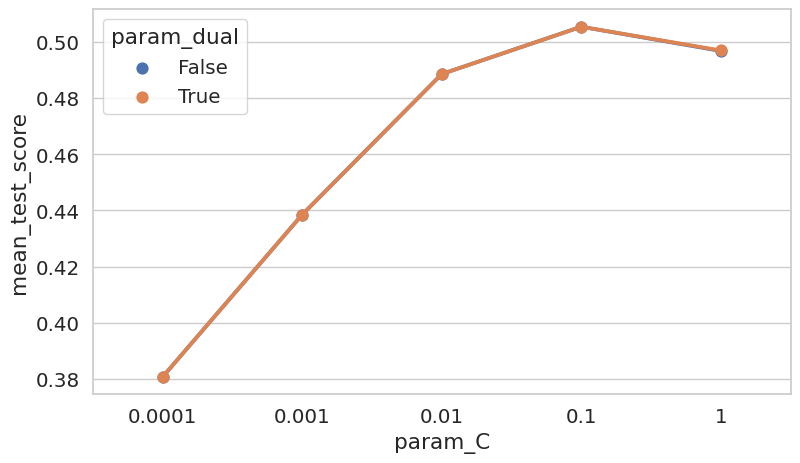

In [ ]:
sns.set(rc={'figure.figsize':(9, 5)})
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.3)

sns.pointplot(
    data=grid_scores,
    x="param_C",
    y="mean_test_score",
    hue="param_dual"
)

plt.savefig("Logistic-regression_param.svg")

##Classification

### All

In [15]:
# get LinearSVC
clf = LogisticRegression(
    C=0.1,
    dual=True,
    random_state=0,
    solver='liblinear'
)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
#print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
print("ROC-AUC: ", roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovr'))

Accuracy 0.4152823920265781
              precision    recall  f1-score   support

       angry       0.41      0.73      0.53        94
        calm       0.45      0.45      0.45        91
     disgust       0.51      0.40      0.45        48
     fearful       0.48      0.35      0.40        92
       happy       0.38      0.27      0.31        93
     neutral       0.35      0.17      0.23        46
         sad       0.35      0.36      0.36        94
   surprised       0.42      0.50      0.45        44

    accuracy                           0.42       602
   macro avg       0.42      0.40      0.40       602
weighted avg       0.42      0.42      0.40       602

ROC-AUC:  0.8308712620813393


In [16]:
# con multi_class='crammer_singer' viene accuracy=0.39

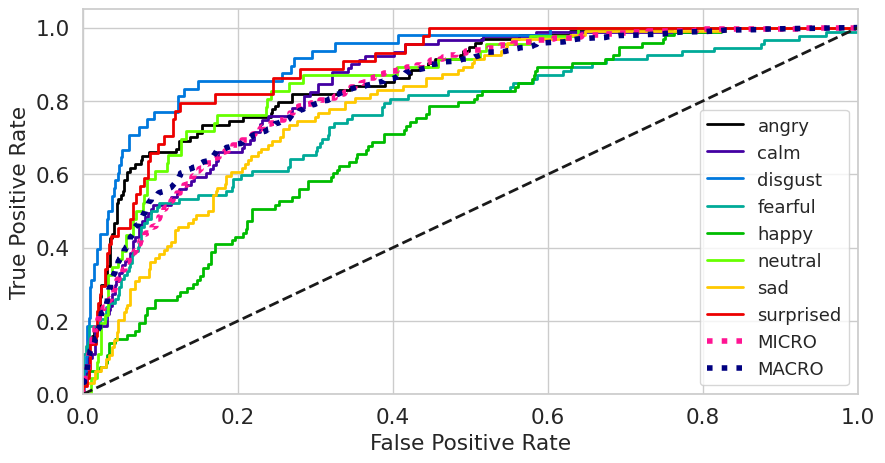

In [17]:
sns.set(rc={'figure.figsize':(10, 5)})
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.3)

plot_roc(
    y_test,
    clf.predict_proba(X_test),
    title=None
)

plt.legend(fontsize=13, labels=["angry","calm", "disgust", "fearful", "happy", "neutral", "sad", "surprised", "MICRO", "MACRO"])
plt.savefig("Logistic_regression_ROC.svg", format="svg")

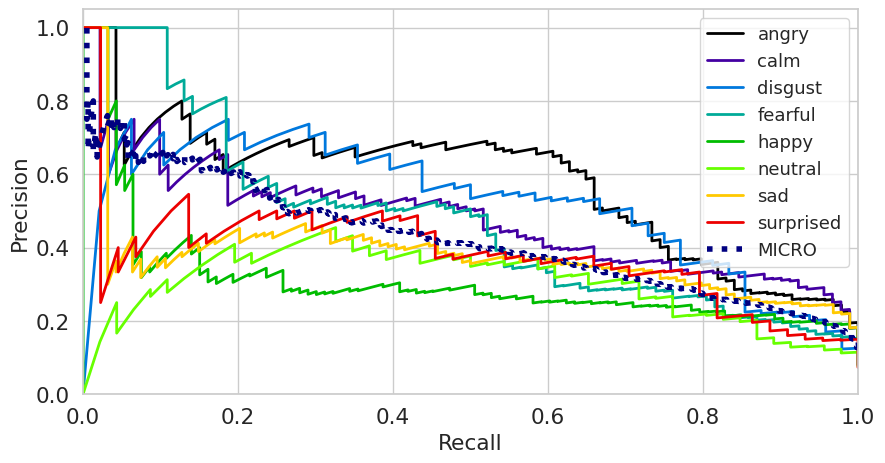

In [18]:
sns.set(rc={'figure.figsize':(10, 5)})
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.3)

plot_precision_recall(
    y_test,
    clf.predict_proba(X_test),
    title=None
)

plt.legend(fontsize=13, labels=["angry","calm", "disgust", "fearful", "happy", "neutral", "sad", "surprised", "MICRO", "MACRO"])
plt.savefig("Logistic-regression_Precision_Recall.svg", format="svg")

In [19]:
feat_imp = abs(clf.coef_).transpose()
feat_imp = np.mean(feat_imp, axis=1)

df_feat_imp = pd.DataFrame(feat_imp, index=df_data_train.columns, columns=["coef"])
df_feat_imp = df_feat_imp.sort_values("coef", ascending=False)
df_feat_imp

,coef
mfcc_max,0.375230
mfcc_q95,0.323031
std,0.314449
zc_sum_w2,0.279778
q25,0.267467
...,...
lag1_skew_w1,0.048216
sum_w4,0.043222
lag1_sum_w4,0.042007
stft_kur_w1,0.041957


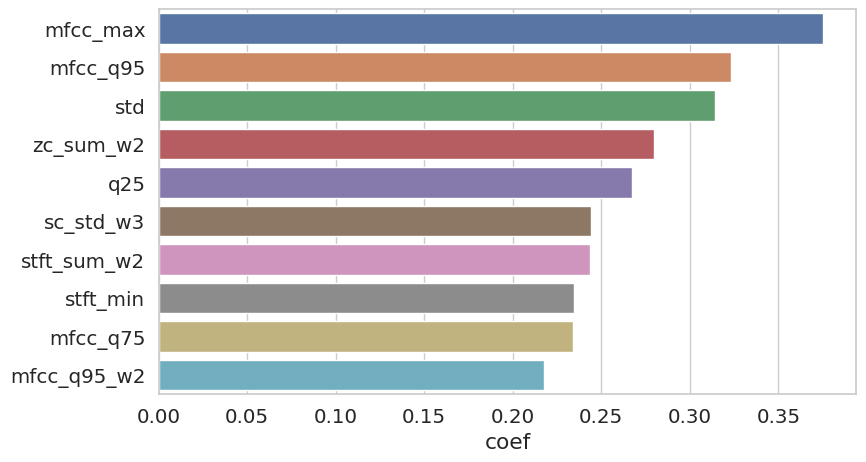

In [20]:
sns.set(rc={'figure.figsize':(9, 5)})
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.3)

sns.barplot(
    data =df_feat_imp[:10],
    x="coef",
    y=df_feat_imp.index[:10],
    orient='h',
    )

plt.savefig("Logistic-regression_features.svg")

### All (50%)

In [21]:
# get LinearSVC
clf = LogisticRegression(
    C=0.1,
    dual=True,
    random_state=0,
    solver='liblinear'
)

clf.fit(X_train_50, y_train_50)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
#print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
print("ROC-AUC: ", roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovr'))

Accuracy 0.3853820598006645
              precision    recall  f1-score   support

       angry       0.41      0.78      0.54        94
        calm       0.45      0.45      0.45        91
     disgust       0.49      0.42      0.45        48
     fearful       0.40      0.35      0.37        92
       happy       0.28      0.14      0.19        93
     neutral       0.22      0.24      0.23        46
         sad       0.33      0.26      0.29        94
   surprised       0.42      0.41      0.41        44

    accuracy                           0.39       602
   macro avg       0.37      0.38      0.37       602
weighted avg       0.37      0.39      0.37       602

ROC-AUC:  0.81670902945271


### Just Speech

In [22]:
# get LinearSVC
clf = LogisticRegression(
    C=0.1,
    dual=True,
    random_state=0,
    solver='liblinear'
)

clf.fit(X_train_speech, y_train_speech)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
#print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, labels=np.unique(y_pred)))
print("ROC-AUC: ", roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovr'))

Accuracy 0.36212624584717606
              precision    recall  f1-score   support

       angry       0.39      0.47      0.43        94
        calm       0.35      0.58      0.44        91
     disgust       0.36      0.58      0.45        48
     fearful       0.41      0.30      0.35        92
       happy       0.29      0.22      0.25        93
     neutral       0.27      0.07      0.11        46
         sad       0.35      0.22      0.27        94
   surprised       0.40      0.48      0.44        44

    accuracy                           0.36       602
   macro avg       0.35      0.36      0.34       602
weighted avg       0.35      0.36      0.34       602

ROC-AUC:  0.7891577772150131


### Just Song

In [23]:
# get LinearSVC
clf = LogisticRegression(
    C=0.1,
    dual=True,
    random_state=0,
    solver='liblinear'
)

clf.fit(X_train_song, y_train_song)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
#print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, labels=np.unique(y_pred)))

Accuracy 0.3538205980066445
              precision    recall  f1-score   support

       angry       0.35      0.82      0.49        94
        calm       0.43      0.44      0.44        91
     fearful       0.35      0.37      0.36        92
       happy       0.33      0.15      0.21        93
     neutral       0.24      0.37      0.29        46
         sad       0.39      0.33      0.36        94

   micro avg       0.35      0.42      0.38       510
   macro avg       0.35      0.41      0.36       510
weighted avg       0.36      0.42      0.36       510

